In [6]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [7]:
import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import torch
import torch.nn.functional as F

from transformers import *

In [9]:
models = {}

In [10]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [13]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-large', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [14]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-xl', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [15]:
model, tokenizer, mask_token = models['roberta-large']

In [ ]:
text = 'Paris is the _ of France'
text = 'Paris is the captital of'
text = 'Q: 4 and 9, which is larger? A:'
text = '''Q: 3 and 5, which is larger? A: 5.
Q: 4 and 9, which is larger? A:'''
text = '''Q: 5, 3, 3, which is different from the others? A: 5.
Q: 2, 2, 7, which is different from the others? A: 7.
Q: 9, 4, 9, which is different from the others? A:'''
text = '''Q: 5, 3, 2. Which is in the middle? A: 3.
Q: 5, 4, 2. Which is in the middle? A:'''
texts = [
'''\
Q: double c. A: c c.
Q: double b. A:''',
'''\
Q: b b b, c c. Which is more, b or c? A: b.
Q: e e , f f f. Which is more, e or f? A: f.
Q: g g g, d d. Which is more, g or d? A:''',
'''\
a b c changes to a b d.
p q r changes to p q s.
i j k changes to''',
'''\
a b c changes to a b d.
p q r s changes to p q r t.
i j k l m changes to''',
    
    
    
# '''\
# i i j j k k changes to i i j j l l.
# a a b b c c changes to a a b b d d.
# p p q q r r changes to''',
# '''\
# a b c changes to a b d.
# e f g h changes to e f g i.
# u v w x y changes to''',
# '''\
# Q: b b b, c c. Which is more, former or latter? A: former.
# Q: e e , f f f. Which is more, former or latter? A: latter.
# Q: g g g, d d. Which is more, former or latter? A:''',
# '''\
# Q: Surround f with b. A: b f b.
# Q: Surround a with d. A: d a d.
# Q: Surround c with e. A:''',
# '''\
# Q: c, b, f. Which letter follows c? A: b.
# Q: b, a, g. Which letter follows a? A: g
# Q: f, g, d. Which letter follows f? A:''',
]

# text = '''Q: 5, 3, 3, which is special? A: 5.
# Q: 2, 2, 7, which is special? A: 7.
# Q: 9, 4, 9, which is special? A:'''

# text = '''Q: 1, 0, 3, 0, 0, 5. Remove 0s. A: 1, 3, 5.
# Q: 0, 1, 3, 0, 5, 5. Remove 0s. A: 1, 3, 5.
# Q: 2, 0, 0, 4, 1, 0. Remove 0s. A:'''

# text = '''Q: 4, 9, 5, which is the largest? A: 9.
# Q: 8, 2, 6, which is the largest? A: 8.
# Q: 3, 1, 7, which is the largest? A: 7.
# Q: 1, 7, 3, which is the largest? A:'''

# text = '''Q: Swap 4 and 7. A: 7 and 4.
# Q: Swap 9 and 3. A: 3 and 9.
# Q: Swap 5 and 2. A:'''

# text = '''Q: 4 = 4? A: Yes.
# Q: 6 = 2? A: No.
# Q: 2 = 2? A: Yes.
# Q: 5 = 5? A:'''

# text = '''Q: 4 and 4. A: Same.
# Q: 6 and 2. A: Different.
# Q: 2 and 2. A: Same.
# Q: 2 and 2. A:'''

# text = '''Q: Which is the former of 5 and 2? A: 5.
# Q: Which is the latter of 7 and 9? A: 9.
# Q: Which is the latter of 1 and 7? A: 7.
# Q: Which is the latter of 6 and 3? A:'''  # former is wrong

# text = '''Q: 5 and 2, which is the former? A: 5.
# Q: 7 and 9, which is the latter? A: 9.
# Q: 1 and 7, Which is the latter? A: 7.
# Q: 6 and 3. Which is the latter? A:'''

# text = '''Q: 5, 3, 2. Which is the first? A: 5.
# Q: 7, 9, 2. Which is the second? A: 9.
# Q: 1, 4, 7. Which is the third? A: 7.
# Q: 5, 4, 2. Which is the second? A:'''

# text = '''Q: 5, 3, 3. How many 3s? A: 2.
# Q: 4, 2, 7. How many 4s? A: 1.
# Q: 1, 1, 1. How many 1s? A: 3.
# Q: 2, 4, 2. How many 5s? A: 0.
# Q: 6, 1, 6. How many 6s? A:'''

text = texts[-1]

In [58]:
texts = [
    'The ball does not fit into the box because the _ is larger than the _ .',
    'The box can not hold the ball because the _ is small .',
    'John borrowed money from Mary because she was rich .',
    'John borrowed money from Mary because he was poor .',
    'John beat Mary because he was strong .',
    'John beat Mary because she was weak .',
#     'John borrowed from Mary because she was rich .',
    'John surpassed Mary because he was fast .',
#     'John surpassed Mary because she was slow .',
    'Thing X _broke thing Y because thing X was _brittle .',
    'John is _taller than Mary means that Mary is _shorter than John .',
    'John is _older than Mary means that Mary is _younger than John .',
    'John is _stronger than Mary means that Mary is _weaker than John .',
    'John is _old but Mary is _young .',
    'John is * old but Mary is * young .',
    'John is * rich but Mary is * poor .',
    'John is * tall but Mary is * short .',
#     'Husky is a kind of _ .',
#     'Lark is a kind of _ .',
#     'Ball A is * bigger than ball B and ball A is * bigger .',
     'Ball A is * bigger than ball B so ball B is * smaller .',
#     'Ball A is * bigger than ball B and ball A is * heavier .',
#    'Ball A is * bigger than ball B so ball B is * lighter .',
#     'A * dog is a kind of * animal .',
#     'An * apple is a kind of * fruit .',
#     'What is a * dog ? It is a kind of * animal .',
#     'What is an * apple ? It is a kind of * fruit .',
]
templates = [
    'A * %s is a kind of * %s .',
    'A %s is a kind of %s .',
#     'What is an * %s ? It is a kind of * %s .',
]
pairs = [
    ('dog', 'animal'),
    ('banana', 'fruit'),
    ('hammer', 'tool'),
    ('gun', 'weapon'),
#     ('dog', '_'),
#     ('banana', '_'),
#     ('hammer', '_'),
#     ('gun', '_'),
]
texts = texts[-4: ]
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
# for pair in pairs[-4:]:
#     text = templates[1] % pair
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        logits, attns = model(input_ids, output_attentions=True)
        probs = F.softmax(logits, dim=-1)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    print("===============================")
   # print(tokenses)
    print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求反义词队的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_every, (p, h) in zip(all_attn_probs, idx_pairs):
    #print(len(attn_every[:, :, p, h]))
    
    attn_one = np.array(attn_every[:, :, p, h])
    #print(attn_one)
   #求和
    attn_sum += attn_one
    #print(attn_sum.shape)
    print("....................")
    #a = np.zeros((24, 16),dtype='int32')
    #b = a.tolist()
    #print(b)
    i = i+1
#sum = attn_sum.tolist()
#求平均
attn_average = attn_sum/i
average = attn_average.tolist()
print(average)
#     token_pairs.append((tokens[p].replace('Ġ', ''), tokens[h].replace('Ġ', '')))

NameError: name 'mask_token' is not defined

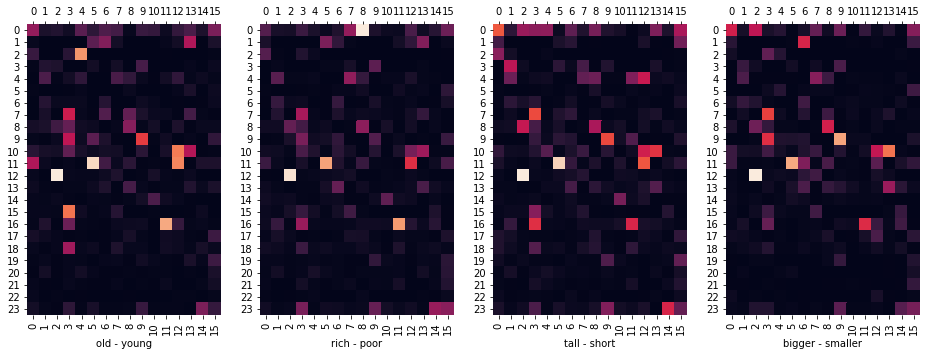

In [133]:
fig, axs = plt.subplots(1,len(all_attn_probs),sharey=False, figsize=(4 * len(all_attn_probs), 6))
for attn_probs, (p, h), tokens, ax in zip(all_attn_probs, idx_pairs, tokenses, axs):
    ax = sns.heatmap(attn_probs[:, :, h, p], square=True, cbar=False, ax=ax)
    ax.tick_params(top=True, labeltop=True)
    ax.set_xlabel('%s - %s' % (tokens[p], tokens[h]))

Text(0.5, 33.0, 'Average-antonym-head')

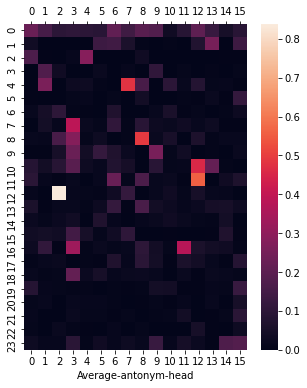

In [137]:
# 求平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-antonym-head')

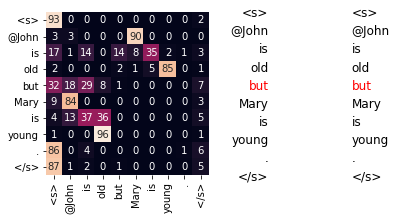

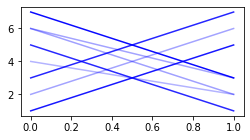

In [50]:
i = 0
layer, head = 12, 2
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)
plot_head_attn(attn, tokens, ax1=ax1) 

In [33]:
def plot_head_attn(attn, tokens, ax1=None):
    assert attn.size(0) == attn.size(1) == len(tokens)
    fig = plt.figure(figsize=(4, round(attn.size(0) / 4)))
    if ax1 is None: ax1 = plt.gca()
    for i in range(attn.size(0)):
        for j in range(attn.size(1)):
            if j in [0, attn.size(1) - 1] or attn[i, j].item() < 0.2: continue
            plt.plot([0, 1], [i, j], color='b', alpha=attn[i, j].item())
    ax1.set_xticks([0, 1])
    ax1.set_xlim(0, 1)
    ax1.axes.xaxis.set_visible(False)

    ax2 = ax1.twinx()
    for ax in [ax1, ax2]: # has to duplicate axes to set color of yticklabel
        ax.set_yticks(np.arange(attn.size(0)))
        ax.set_yticklabels(tokens, fontsize=12)
        for i, yticklabel in enumerate(ax.get_yticklabels()):
            if i in [p, h]:
                yticklabel.set_color('r')
        ax.tick_params(length=0)
        ax.set_ylim(attn.size(0) - 1, 0)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    plt.show()

In [20]:
# 把词库的词替换到句子模板
animal_model = ['John is * _ than Mary means that Mary is * = than John .',
             'John is * _ but Mary is * = .',
             'Ball A is * _ than ball B so ball B is * = .',
             
            ]
noun_model = []
texts = []
pairs = [['bigger','smaller'],['rich','poor']]
for text in animal_model:
    for idx in pairs:
        print(idx[0])
        print(idx[1])
        #print(".................")
        example = text.replace('_', idx[0]).replace('=', idx[1])
        print(example)
        texts.append(example)
        print(texts)
        print(".........")


bigger
smaller
John is * bigger than Mary means that Mary is * smaller than John .
['John is * bigger than Mary means that Mary is * smaller than John .']
.........
rich
poor
John is * rich than Mary means that Mary is * poor than John .
['John is * bigger than Mary means that Mary is * smaller than John .', 'John is * rich than Mary means that Mary is * poor than John .']
.........
bigger
smaller
John is * bigger but Mary is * smaller .
['John is * bigger than Mary means that Mary is * smaller than John .', 'John is * rich than Mary means that Mary is * poor than John .', 'John is * bigger but Mary is * smaller .']
.........
rich
poor
John is * rich but Mary is * poor .
['John is * bigger than Mary means that Mary is * smaller than John .', 'John is * rich than Mary means that Mary is * poor than John .', 'John is * bigger but Mary is * smaller .', 'John is * rich but Mary is * poor .']
.........
bigger
smaller
Ball A is * bigger than ball B so ball B is * smaller .
['John is * bigger

In [ ]:
# 数据集数据处理
# DiffVec
filename = 'diffvec_word_pairs_final.SEMBLESS.csv'
file_colname=['relation','word1','word2']
df = pd.read_csv(filename,header=None,names=file_colname)
df_clean = df[df['relation'].str.contains('Prevention')]
df_clean

In [56]:
# BATS_3.04_Lexicographic_semantics
#result = [[[idx_list1],[idx_antonyms_list1]],[[],[]],....]
import re
filename = 'antonyms_adj.txt'

result=[]
with open('antonyms_adj.txt','r') as f:
    #print(f.read())
    for line in f:
        #print(line)
        #a = list(line.strip('\n').split(','))
        a = re.split(r'[\s]',line)
        b = re.split(r'/',a[0])
        c = re.split(r'/',a[1])
        d = [b,c]
        #print(d)
        #print(b)
       # print(a)
        result.append(d)
        #print(result)
        #print("................")
        
        #result.append(list(line.strip('\n').split(',')))
#print(result)

#词替换
adj_model = ['John is * _ than Mary means that Mary is * = than John .',
             'John is * _ but Mary is * = .',
             'Ball A is * _ than ball B so ball B is * = .',
             
            ]
noun_model = []
texts = []
for text in adj_model:
    for idx_list,idx_antonym_list in result:
        for idx in idx_list:
            #print(idx)
            for idx_antonym in idx_antonym_list:
                #print(idx_antonym)
                example = text.replace('_', idx).replace('=', idx_antonym)
                texts.append(example)
print(texts)
print("..................")  
  

#使用词库来替换
i = 0
adj_model = ['John is * _ than Mary means that Mary is * = than John .',
             'John is * _ but Mary is * = .',
             'Ball A is * _ than ball B so ball B is * = .',
             
            ]
noun_model = []
texts = []
pairs = [['bigger','smaller'],['rich','poor']]
for text in adj_model:
    for idx in pairs:
        print(idx[0])
        print(idx[1])
        #print(".................")
        example = text.replace('_', idx[0]).replace('=', idx[1])
        print(example)
        texts.append(example)
        print(texts)
        print(".........")


['John is * beautiful than Mary means that Mary is * ugly than John .', 'John is * beautiful than Mary means that Mary is * disfigured than John .', 'John is * beautiful than Mary means that Mary is * evil-looking than John .', 'John is * beautiful than Mary means that Mary is * fugly than John .', 'John is * beautiful than Mary means that Mary is * grotesque than John .', 'John is * beautiful than Mary means that Mary is * monstrous than John .', 'John is * beautiful than Mary means that Mary is * hideous than John .', 'John is * beautiful than Mary means that Mary is * repulsive than John .', 'John is * beautiful than Mary means that Mary is * ill-favored than John .', 'John is * beautiful than Mary means that Mary is * ill-favoured than John .', 'John is * beautiful than Mary means that Mary is * scrofulous than John .', 'John is * beautiful than Mary means that Mary is * unlovely than John .', 'John is * beautiful than Mary means that Mary is * unpicturesque than John .', 'John is 

In [ ]:
# am-for-bert/dataset/WNLaMPro.txt
f = open(r"D:\data.txt")
line = f.readline()
data_list = []
while line:
    num = list(map(float,line.split()))
    data_list.append(num)
    line = f.readline()
f.close()
data_array = np.array(data_list)

In [57]:
# 求head值
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
# for pair in pairs[-4:]:
#     text = templates[1] % pair
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        logits, attns = model(input_ids, output_attentions=True)
        probs = F.softmax(logits, dim=-1)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    print("===============================")
   # print(tokenses)
    print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求反义词队的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_every, (p, h) in zip(all_attn_probs, idx_pairs):
    #print(len(attn_every[:, :, p, h]))
    
    attn_one = np.array(attn_every[:, :, p, h])
    #print(attn_one)
   #求和
    attn_sum += attn_one
    #print(attn_sum.shape)
    print("....................")
    #a = np.zeros((24, 16),dtype='int32')
    #b = a.tolist()
    #print(b)
    i = i+1
#sum = attn_sum.tolist()
#求平均
attn_average = attn_sum/i
average = attn_average.tolist()
print(average)

NameError: name 'mask_token' is not defined

In [ ]:
# 求平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-antonym-head')